In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
df = pd.read_csv('../input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [3]:
cat_columns = df.select_dtypes(include='object').columns
print('Categorical columns: \n', cat_columns)
print('-' * 30)
cont_columns = df.select_dtypes(exclude='object').columns
print('Continous columns: \n', cont_columns, '\n their count is ', len(cont_columns))

Categorical columns: 
 Index(['CUST_ID'], dtype='object')
------------------------------
Continous columns: 
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object') 
 their count is  17


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Initially it seems from the above data description that the data is skewed, as there's large difference between mean and median values in many columns.

In [5]:
#Check Nulls
df.isna().sum()*100/len(df)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

#### There's only nulls in 2 columns, I will use the KNN Imputer to fill the null values in the missing columns based on their K Nearest Neighbor values.

### KNN Imputer

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[cont_columns] = imputer.fit_transform(df[cont_columns])

In [7]:
df.isna().sum()*100/len(df)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

#### To make sure from data skewness that initially observed from data description, I'll visualize the data distribution

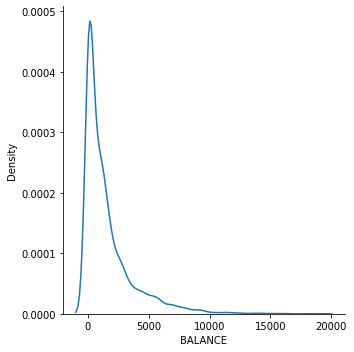

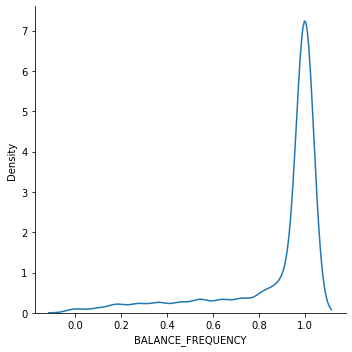

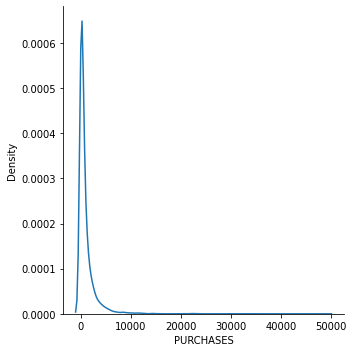

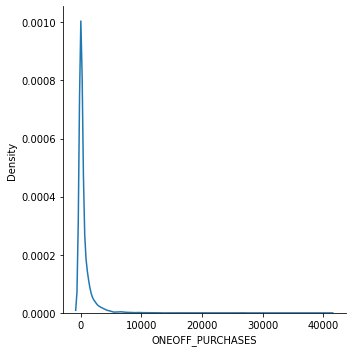

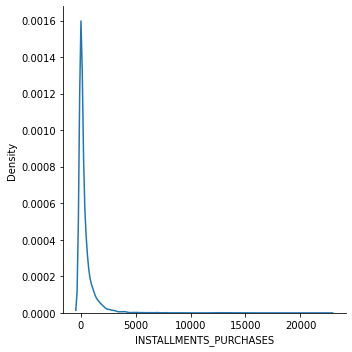

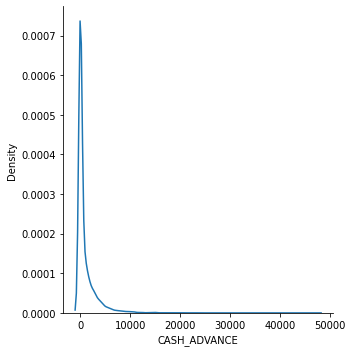

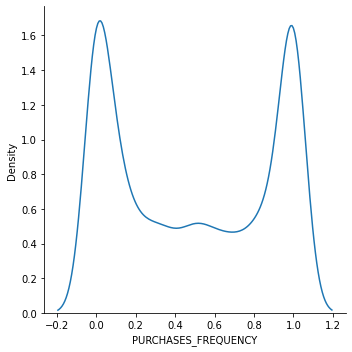

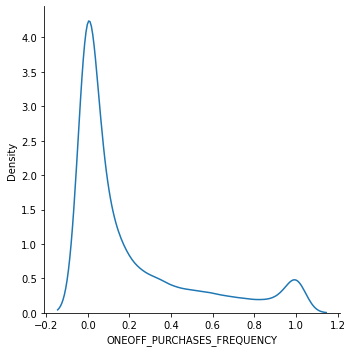

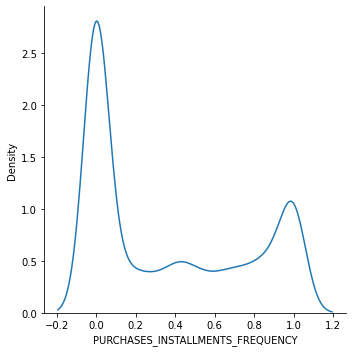

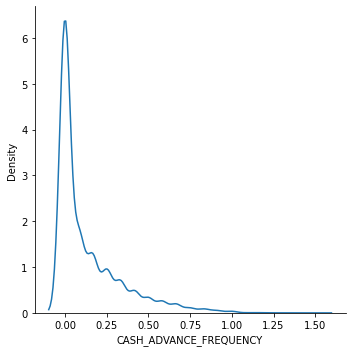

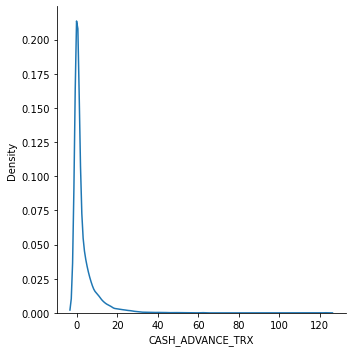

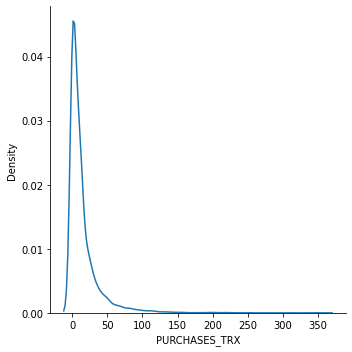

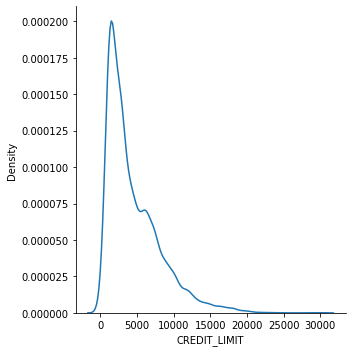

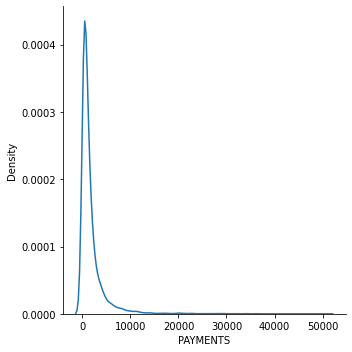

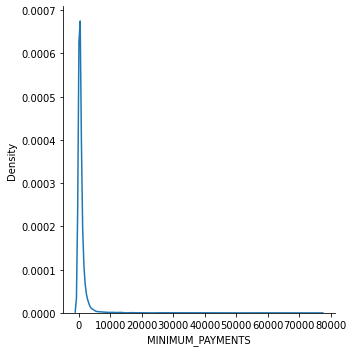

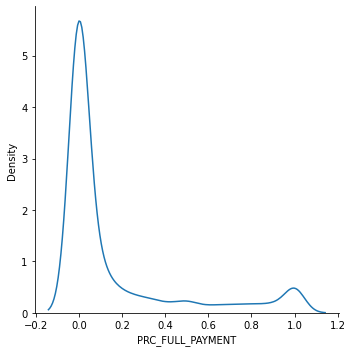

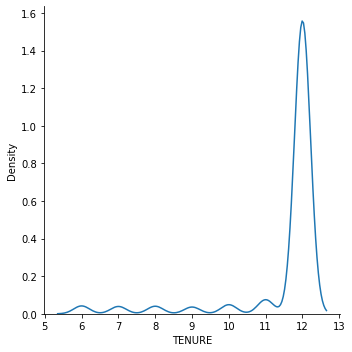

In [8]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

#### It seems most of the features distribution are right skewed, so I will apply log transformation on the features to decrease the skewness

In [9]:
for col in cont_columns:
    df[col]= np.log(1 + df[col])

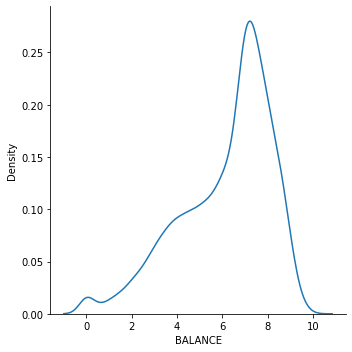

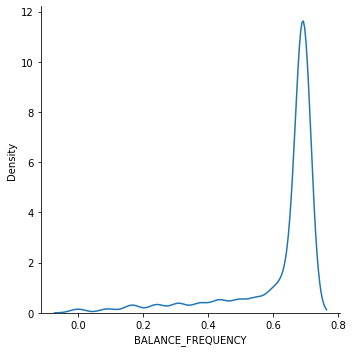

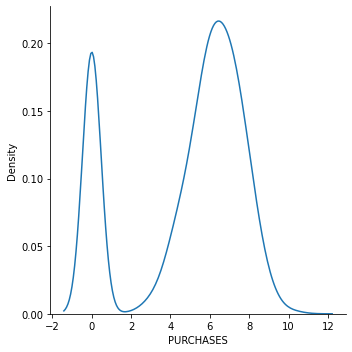

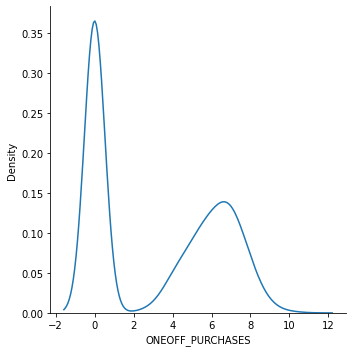

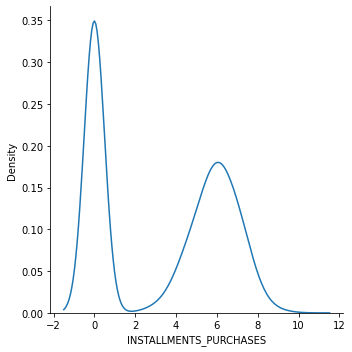

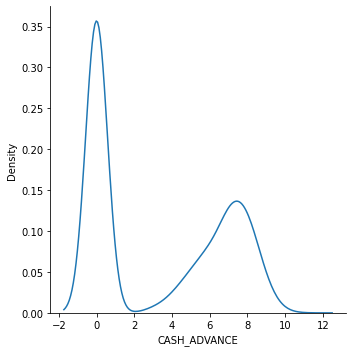

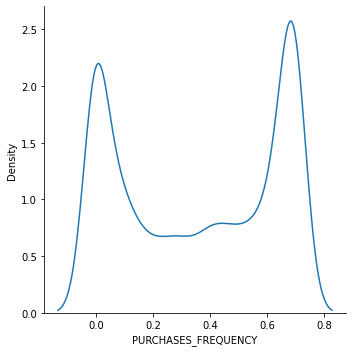

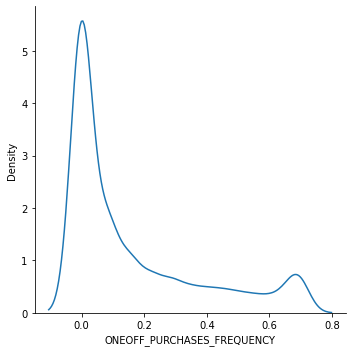

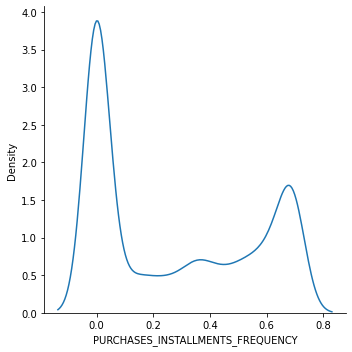

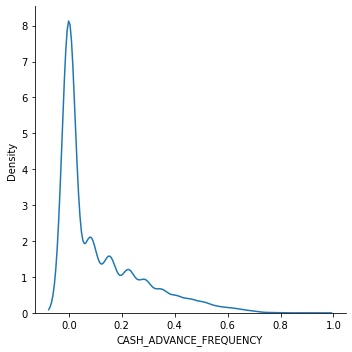

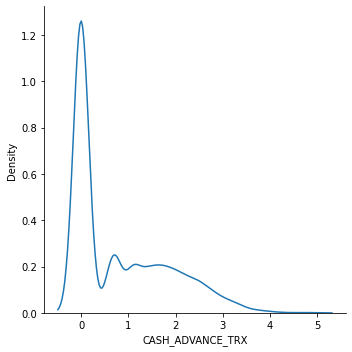

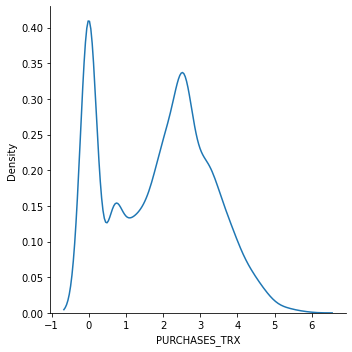

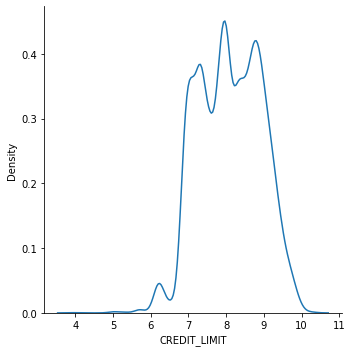

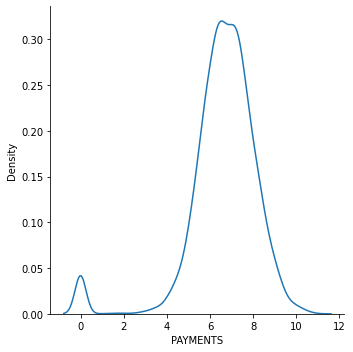

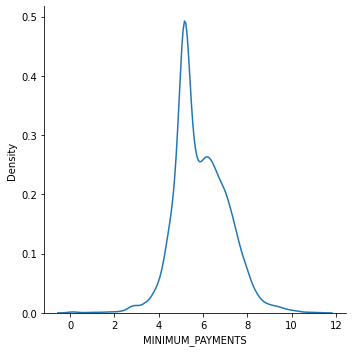

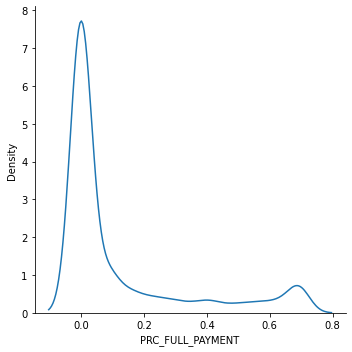

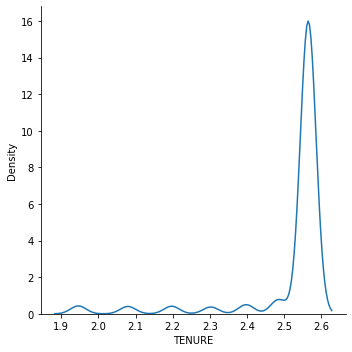

In [10]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

#### After transformation, I'll apply data scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[cont_columns] = scaler.fit_transform(df[cont_columns])

In [12]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447089,-0.824484,-0.798441,-0.556368,0.347262
1,C10002,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.926095,1.065033,0.903333,0.391958,0.347262
2,C10003,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010262,-0.119300,0.455104,-0.556368,0.347262
3,C10004,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,1.010262,-4.161996,0.036082,-0.556368,0.347262
4,C10005,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224839,-0.064979,-0.330402,-0.556368,0.347262


#### Then I'll check the data correlation,as I gonna apply PCA on the data later

<AxesSubplot:>

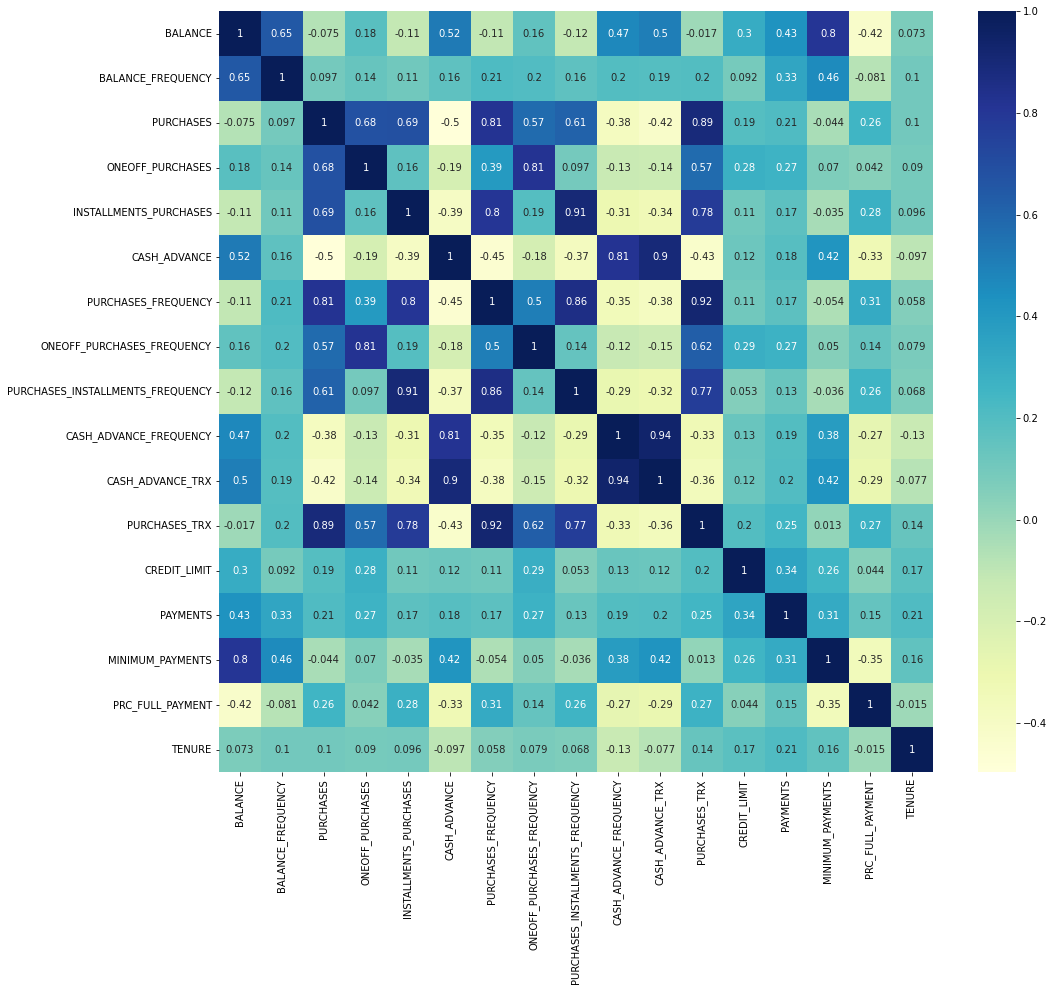

In [13]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [14]:
data = df[cont_columns]
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## Machine Learning Models

### 1) K-Means Clustering

#### At first to get the proper number of clusters, I'll assume range clusters number from 2 to 20, and apply both:  
#### a) Elbow Method        b) Silhouette Cofficient Method 


### a) Elbow Method

In [15]:
from sklearn.cluster import KMeans

clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    square_distance.append(KM_model.inertia_)
    
square_distance

[152150.00000000017,
 112333.99724800901,
 94489.01819334221,
 85169.73968219511,
 76203.21774538276,
 69944.84955737536,
 66115.80430704741,
 62614.17501179765,
 59629.77143132551,
 56968.669643474415,
 54776.12014796592,
 52774.85497992549,
 51277.241966185284,
 49398.7225436069,
 48064.26780699051,
 46650.38924829421,
 45775.11178332714,
 44714.71512849023,
 43685.25166796814]

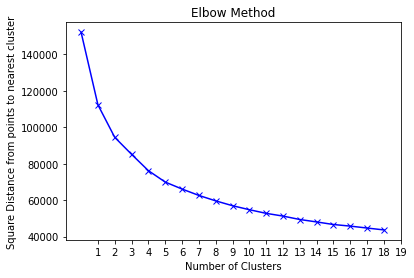

In [16]:
ax , fig = plt.subplots()
ax = plt.plot(square_distance , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Square Distance from points to nearest cluster")
plt.title("Elbow Method")
plt.show()


#### In determining the clusters numbers the business case study plays important role besides the method used.
#### The elbow seems almost at 6 or 7 clusters, let's make sure by silhouette method

### b) Silhouette Cofficient Method

In [17]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2,20):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    sil_scores.append(round(silhouette_score(data , KM_model.labels_),4))

print(sil_scores)

[0.2595, 0.2301, 0.2159, 0.2286, 0.2304, 0.2329, 0.2255, 0.1883, 0.1881, 0.1893, 0.1924, 0.1923, 0.1945, 0.1962, 0.1895, 0.1827, 0.1961, 0.1958]


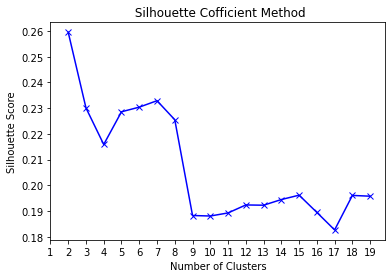

In [18]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

#### Silhouette Cofficient method get 2 is the best then 3 then 7 then 6.
#### As per methods outputs as well as business case I'll chose clusters number = 2

In [19]:
KM_model = KMeans(2, init='k-means++', n_init=15, max_iter=400)
KM_model.fit(data)

KMeans(max_iter=400, n_clusters=2, n_init=15)

In [20]:
clustered_data = pd.concat( [data,pd.DataFrame({'Cluster':KM_model.labels_})] , axis=1)
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447089,-0.824484,-0.798441,-0.556368,0.347262,1
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.926095,1.065033,0.903333,0.391958,0.347262,0
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010262,-0.119300,0.455104,-0.556368,0.347262,1
3,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,1.010262,-4.161996,0.036082,-0.556368,0.347262,0
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224839,-0.064979,-0.330402,-0.556368,0.347262,0


#### Let's visualize clusters againt each of the features to get some meanings about the custers

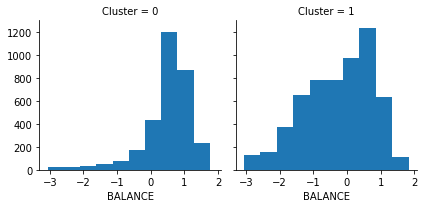

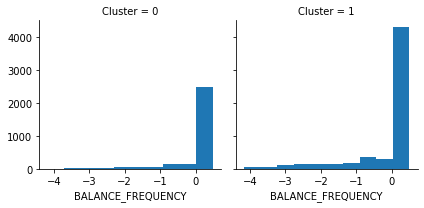

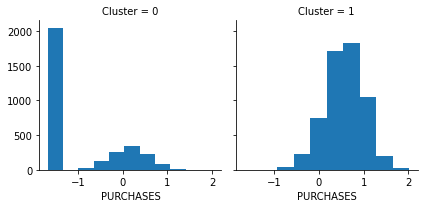

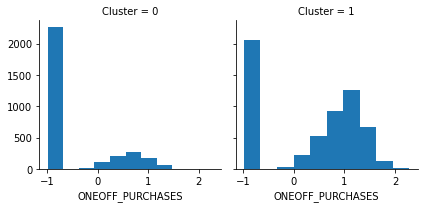

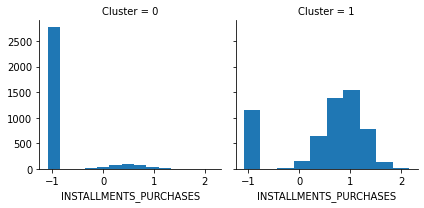

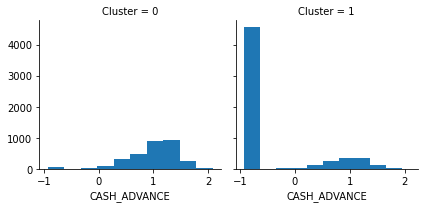

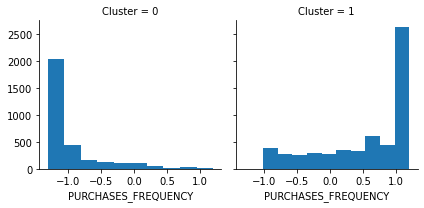

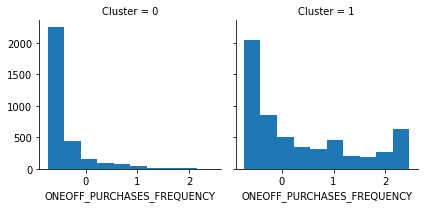

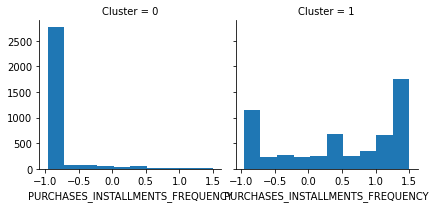

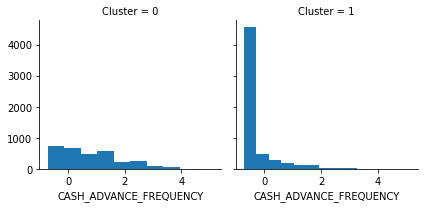

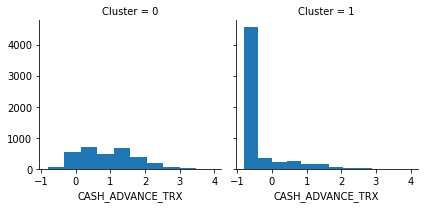

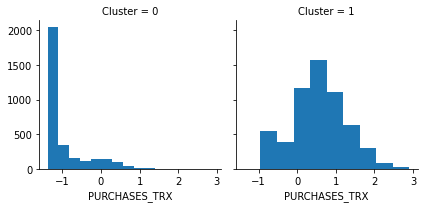

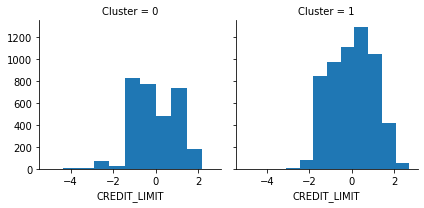

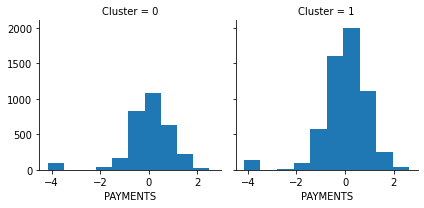

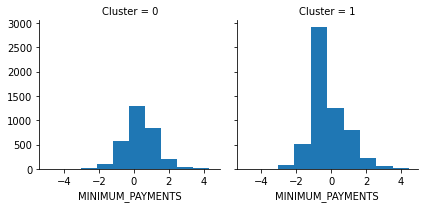

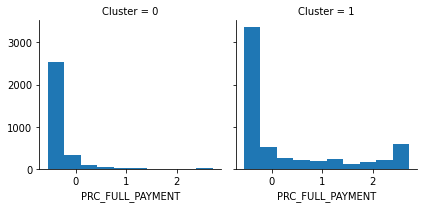

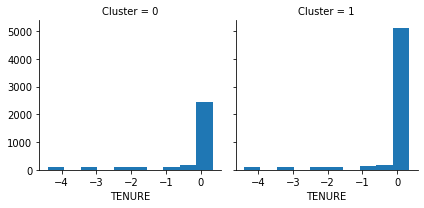

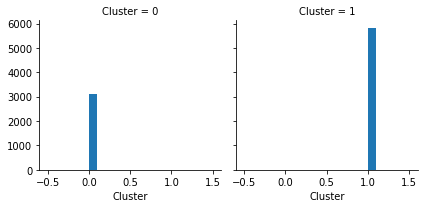

In [21]:
for c in clustered_data:
    grid = sns.FacetGrid(clustered_data, col='Cluster')
    grid.map(plt.hist, c)

In [22]:
#Apply inverse transformation
for col in cont_columns:
    clustered_data[col] = np.exp(clustered_data[col])
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.299627,0.861778,0.892675,0.372660,1.483612,0.394265,0.473833,0.480715,0.509537,0.484634,0.444827,0.560173,0.235254,0.438461,0.450030,0.573287,1.415188,1
1,2.582912,1.196757,0.186401,0.372660,0.337074,4.612584,0.271770,0.480715,0.383561,2.012932,2.191536,0.251777,2.524631,2.900935,2.467814,1.479875,1.415188,0
2,2.281864,1.636746,1.823443,2.892212,0.337074,0.394265,3.309577,11.784227,0.383561,0.484634,0.444827,1.628835,2.746321,0.887542,1.576337,0.573287,1.415188,1
3,1.867598,0.424066,2.287590,3.545849,0.337074,1.758344,0.362710,0.695557,0.383561,0.807685,0.884015,0.417006,2.746321,0.015576,1.036741,0.573287,1.415188,0
4,1.311616,1.636746,0.492391,0.891984,0.337074,0.394265,0.362710,0.695557,0.383561,0.484634,0.444827,0.417006,0.293805,0.937087,0.718635,0.573287,1.415188,0


#### Dimensionality Reduction (PCA)

In [23]:
#Apply dimensionality reduction so we can visualize our clusters
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(clustered_data)
DR_clustered_data = pca.transform(clustered_data)
DR_clustered_data.shape

(8950, 2)

In [24]:
#DR_clustered_data = pd.DataFrame(DR_clustered_data)
#DR_clustered_data.columns= ['Feature1','Feature2']
#DR_clustered_data.head()

#### Visualize Clusters (k-Means)

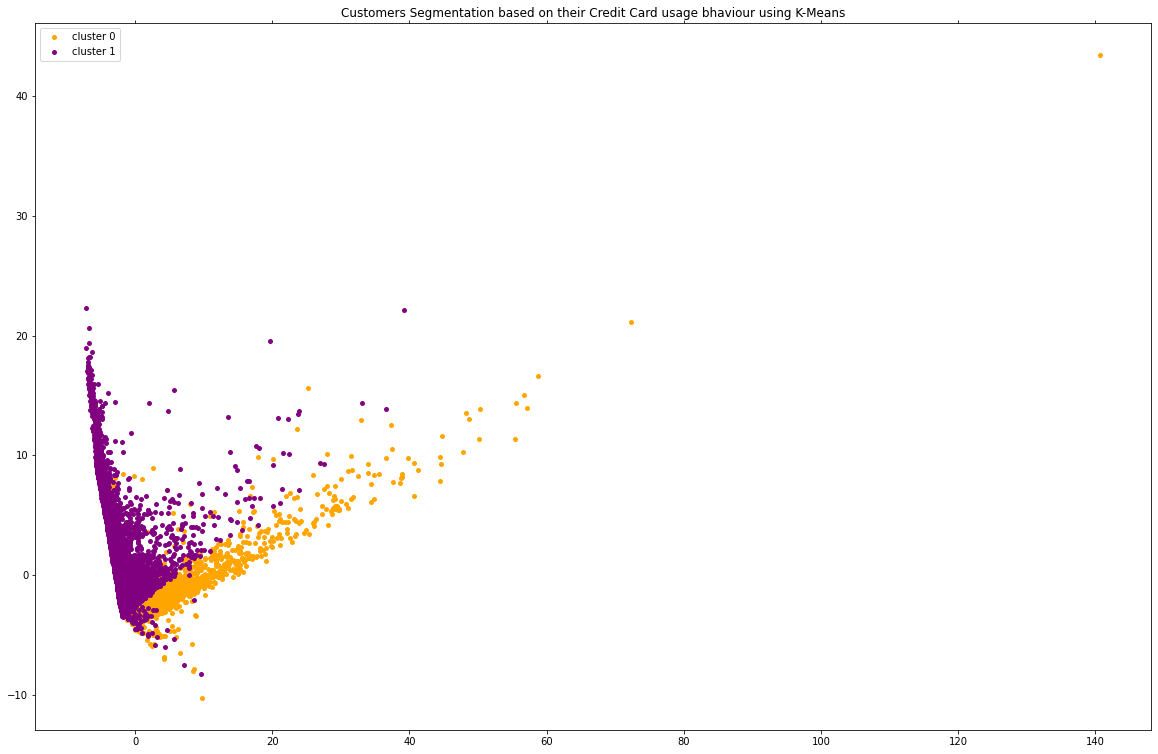

In [25]:
x, y = DR_clustered_data[:, 0], DR_clustered_data[:, 1]

colors = {0: 'orange',
          1: 'purple'}
       

names = {0: 'cluster 0', 
         1: 'cluster 1'}
   
  
df_vis = pd.DataFrame({'x': x, 'y':y, 'label':KM_model.labels_}) 
groups = df_vis.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour using K-Means")
plt.show()


In [26]:
pca = PCA(2)
pca.fit(data)
DR_data = pca.transform(data)
DR_data.shape
DR_data = pd.DataFrame(DR_data)
DR_data.columns= ['Feature1','Feature2']

### 2) Hierarical Clustering (Aggloremative Clustering)

#### I'll visualize the dendogram of the bottom-up approach of hierarical clustering (Agg Clustering)

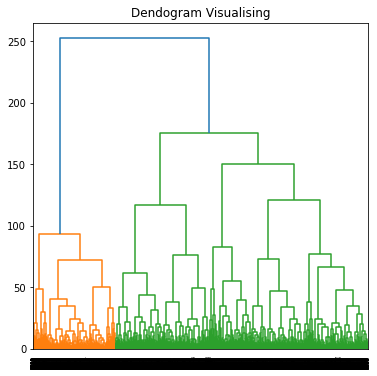

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6)) 
plt.title('Dendogram Visualising') 
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward'))) 

In [28]:
#Reapply Silhouette score this time on Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
for i in range(2,20):
    HC_model = AgglomerativeClustering(n_clusters = i)
    HC_model.fit(data)
    sil_scores.append(round(silhouette_score(data , HC_model.labels_),4))

print(sil_scores)

[0.2259, 0.1685, 0.1759, 0.1646, 0.1742, 0.1838, 0.1896, 0.1931, 0.1736, 0.1687, 0.1517, 0.1442, 0.1464, 0.1483, 0.1367, 0.1357, 0.1404, 0.1442]


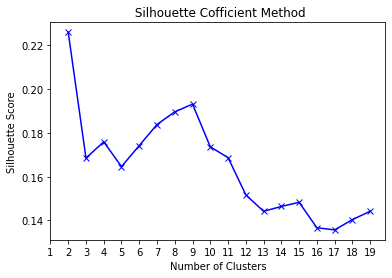

In [29]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [30]:
#Fit model and also on 2 clusters
HC_Model = AgglomerativeClustering(n_clusters = 2)
HC_Model.fit(data)

AgglomerativeClustering()

#### Visualize Clusters (Agglomerative Clustering)

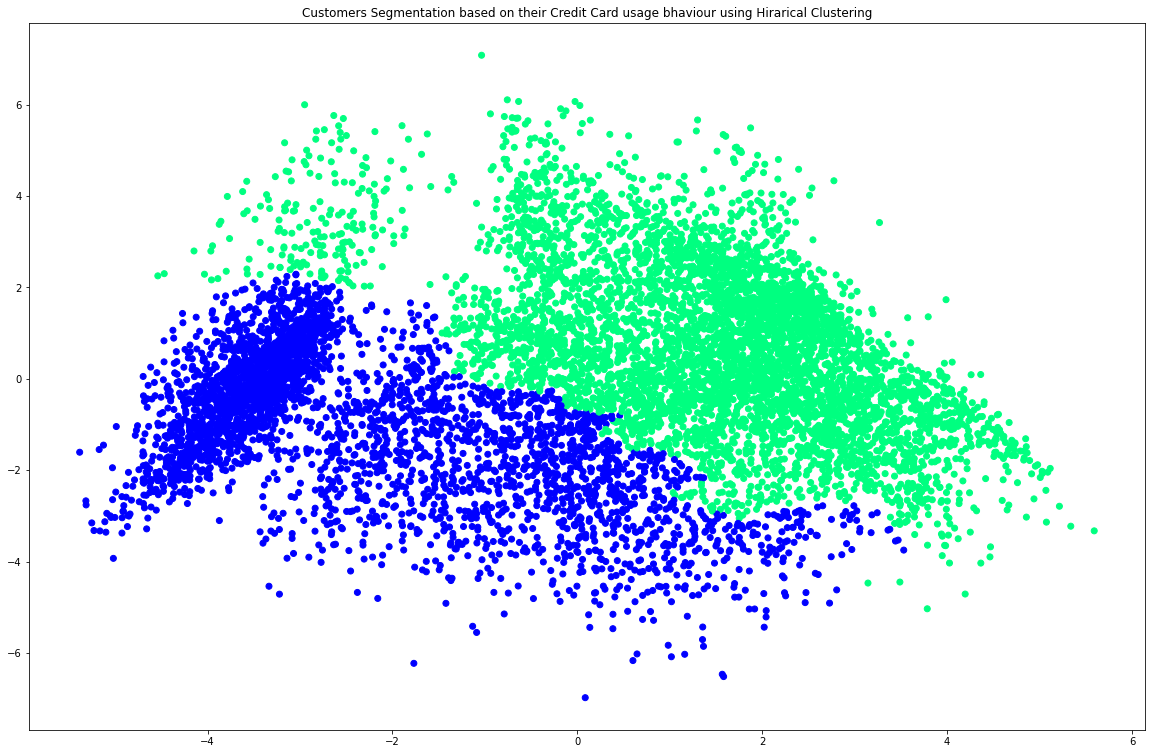

In [31]:
# Visualizing the clustering 
fig , ax = plt.subplots(figsize=(20, 13))
plt.scatter(DR_data['Feature1'], DR_data['Feature2'],  
           c = HC_Model.fit_predict(DR_data), cmap =plt.cm.winter) 
ax.set_title('Customers Segmentation based on their Credit Card usage bhaviour using Hirarical Clustering')

plt.show() 

#### Sklearn documentation is a great organized resource for any topic I used in the notebook
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html